# **Starting Kit: Churn prediction for telecom operators**
####  Mkrtich Vatinyan -- Danial Ghanbari -- Alexis Blanchet 
***

# 0. Introduction

<br/>
The contemporary world is witnessing a growing amount of telecom operators, in occidental as well as in the newly developing countries. For instance in France, we have seen the emergence of Free (as an Internet provider first, in the mobile market since 2009), the arrival of which disrupted the whole french telecom competitive landscape. 
<br/>

Obviously, this context of high competitivity has its benefits: the companies must surpass themselves in order to keep up with the profit, the market share,  the turn-over. Thus the situation is prone to a kind of “innovation race”, where the operators continuously aim to enhance the technical characteristics of their products by proposing higher mobile broadbands  (4G in the previous years, which is now widely implemented, research now focusing on 5G). 

<br/>

However, it has also its downside: since in many areas, several companies are competing for customers, this makes it easy for people to **transfer from one provider to another**. Thus an important part of the companies work becomes not losing its clients to other telecom companies. The rate of customers which stop their affiliation to a given provider is called the churn rate. **Churn prediction hence turns out to be of paramount industrial interest**. It is an indicator for the wellness of the company, an important factor in the measure of growth and an important indicator of how the company is keeping up with its competitors. This is the problem we will focus on in this project.

<br/>

The [data](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) that we will manipulate is from IBMs Watson Analytics database.

<br/>
Here is an overview of the feature structure :

- **customerID** : customer ID 
- **gender** : client's gender - male/female
- **SeniorCitizen** : Whether the customer is a senior citizen or not - Yes/No
- **Partner** : Whether the customer has partners or not - Yes/No
- **Dependents** : Whether the customer has dependents or not - Yes/No
- **Tenure** : How long the customer has been a client of the company - int


- **PhoneService** : Whether the customer has phone service or not - Yes/No
- **MultipleLines** : Whether the customer has multiple lines or not - Yes/No/No phone service


- **InternetService** : Whether the customer has internet service or not - DSL/Fiber optic/No
- **OnlineSecurity** : Whether the customer has online security or not - Yes/No/No internet service
- **OnlineBackup** : Whether the customer has online backup or not - Yes/No/No internet service
- **DeviceProtection** : Whether the customer has device or not - Yes/No/No internet service
- **TechSupport** : Whether the customer has technical support or not - Yes/No/No internet service
- **StreamingTV** : Whether the customer has TV streaming or not - Yes/No/No internet service
- **StreamingMovies** : Whether the customer has movies streaming or not - Yes/No/No internet service


- **Contract** : Type of the customer's contract - Month-to-month/One year/Two year
- **PaperlessBilling** : Whether the customer has paperless billing or not - Yes/No
- **PaymentMethod** : Type of the payment method - Mailed check/Electronic check/Credit card (automatic)/Bank transfer (automatic)
- **MonthlyCharges** : The value of customer's monthly charge - float
- **TotalCharges** : The value of customer's total charge - float
- **Churn** (label) : Whether the customer has churned or not - Yes/No

### 0.1 Predictor usage
<br/>
Churn prediction is one of the biggest interests for a company's Customer Relationship Management (CRM) and Marketing fields. So how are they going to use the algorithm that we'll develop ? In our understanding, the predictor will be used as a decision support. The goal for them, is to identify clients that will potentially leave for the company to undertake action to avoid losing them. The better a company predicts potential churners among its clients, the more likely it is to grow profitably by keeping/improving its market share and hence overall sales.


### 0.2 Long term usage of the predictor
<br/>
Every day, the dataset will potentially evolve so we need to define the frequence of retraining necessary to the model in order to be efficient. Theoritically it should be updated every time the company has an unpredicted churner. However, in order to meet cost-efficiency for the company, one can fix a *threshold of unpredicted churners in a given amount of time* that if passed would trigger off the retraining process. If the company has the adequate infrastructure, it would be even better to run the retraining in a distributed network.



### 0.3 Do we have enough data ?  
<br/>
To work on churn rates in general, we need customer data from any subscription based company: the telecom operators are an ideal example. However the providers don’t share their data since its confidential information, so one can only find anonymized or synthetic datasets. To build a predictive model, any anonymized dataset from a provider, as the one that we are going to use, can be used. As we sad before this dataset in reality has a great chance to be updated continuously, so eventually there will be enough data to be confident about the predictors efficiency.


### 0.4 Evaluating the predictor

Denote the churners as class 1 and the non churners as class 0. This allows us to use terms such as true positives or false negatives. Each prediction can be categorized in 4 ways as we can see in the table below:

|               | Predicted churners           | Predicted non-churners  |
| ------------- |:-------------:| -----:|
| **Actual churners**    | True positive | False negative |
| **Actual non-churners**      | False positive     |   True negative |
<br/>

Precision is the proportion of the predicted churners that were correct
and is calculated from the equation: 

### <center/> $P = \frac{TP}{TP+FP}$

Recall is the proportion of churners that were correctly identified
and is calculated from the equation: 

### <center/> $R =  \frac{TP}{TP+FN}$ 


The F-score will be used since none of the two metrics described above taken alone is representative of the classifiers performance. The F-score is the harmonic mean of P and R: 


### <center/>$F = \frac{2PR}{P+R}$


A value closer to one implies that we have a better combined precision and recall. So ideally we would like our classifier to have the best F-score possible. At this point we need to ask ourselves the following question: what is the most valuable in our study, precision or recall ? 

<br/>
<br/>
[Customer churn rate](https://www.klipfolio.com/resources/kpi-examples/saas-metrics/customer-churn-rate): “Customer Churn Rate is a critical KPI for these types of businesses because (1) the cost of retaining a current customer is almost always less than attaining a new one, and (2) for businesses with recurring revenue models, keeping a customer can be worth hundreds and even thousands of dollars in future revenue.”  

<br/>

Customer retention is our goal, and from various sources ([here](https://exchange.cim.co.uk/blog/why-retention-marketing-is-so-important/),[here](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers) or the link given above) we know that keeping a customer is much less expensive than acquiring a new one and has a more interesting long term benefit. **Assume the worse case scenario where the loss of a customer must imply the necessity of acquiring a new one and denote $A$ the cost of keeping the client, $B$ the cost of acquiring a new one ($A$<<$B$)**. Let us examine the costs:


* TP: churner identified, action taken to prevent leaving, cost $A$
* FN: churner predicted as non-churner, no action taken, loss of client so acquisition of a new one, cost $B$
* FP: non-churner predicted as churner, action taken, cost $A$
* TN: non-churner predicted as non-churner, no action taken, cost $0$


As we can see False Negatives will be the most coslty for our company, so recall is crucial for the performance of our classifier. We can define an overall cost function that should be minimized by our classifier:


#### <center/>$Cost = (TP + FP)*A + FN*B = (TP + FP + r*FN)*A$


Defining ~~$r = \frac{B}{A}$~~ as the ratio of cost of acquisition and cost of keeping a customer: a False Negative costs r times the money invested in a False Positive. The global problem is the minization of that cost, for a given r. Obviously the underlying task is predict correctly the churners with as less false negatives as possible. In other words, our classification task is **recall-oriented**. Thus to evaluate the model from that point of view we will use the **weighted F-score**:


### <center/>$F = \frac{(1+\beta)PR}{\beta P+R}$


Where $\beta >1$ will give more weight to recall in the computation of the score. Since this is a value that must come from a certain domain knowledge, we can not be sure about the relevancy of the value for $\beta$. What we know is that it represents the weight ratio of recall/precision, so implicitly it is related to the r ratio defined above. We will set $\beta = 5$ for our use case.


---
# 1. Exploratory data analysis

In [1]:
from time import time
import warnings
warnings.filterwarnings('ignore')

# Import libraries to manipulate data
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999

# Import libraries for visualization
# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn, handy usage with pandas DataFrames
import seaborn as sns

### 1.1 Loading the data

In [2]:
# Load from csv files
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Visualize head of DataFrame
train.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7109-MFBYV,Male,0,No,No,26,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.45,1233.15,0
1,1925-LFCZZ,Male,1,No,No,55,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),50.05,2743.45,0
2,0619-OLYUR,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.90,8071.05,0
3,4612-THJBS,Female,1,No,No,56,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),104.75,5510.65,1
4,0795-XCCTE,Male,1,No,No,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.40,1809.35,0


In [3]:
print("Test data shape", test.shape)
print("Training data shape", train.shape)
train.dtypes

Test data shape (2113, 21)
Training data shape (4930, 21)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

As we can see here most of the features are categorical, and only a few of them are numerical. Senior Citizen features are numerical, but we can easily see that 0-1 here are the equivalent of No-Yes as in the other columns. So in this preliminary step we will change this feature values to categorical. The Total Charges features has a type of object but as we can see its values are floats. Let us check if there is any missing entries in the DataFrame and see why Total Charges data type isn't float64.


In [4]:
print(train.isnull().values.any())
print(train.isna().values.any())

for element in list(train['TotalCharges']):
    try: float(element)
    except: print(list(element))

False
False
[' ']
[' ']
[' ']
[' ']
[' ']
[' ']


There are no apparent missing values in the data detected by pandas built-in functions, however the Total Charges column has some missing entries. Let us put those entries to 0 and convert the entries to float. Let us also change Senior Citizen column values to categorical ones to have a coherent dataset.

In [5]:
train['SeniorCitizen'] = train['SeniorCitizen'].map(lambda x: 'No' if x==0 else 'Yes')
test['SeniorCitizen'] = test['SeniorCitizen'].map(lambda x: 'No' if x==0 else 'Yes')
train['TotalCharges'] = train['TotalCharges'].map(lambda x: 0. if x==' ' else float(x))
test['TotalCharges'] = test['TotalCharges'].map(lambda x: 0. if x==' ' else float(x))


Doing so, the describe() function will allow us to see some basic statistics on the numerical features and the target column.


In [6]:
# There are 3 numerical features in the training data that can be summerized by .describe()
train.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,4930.000000,4930.000000,4930.000000,4930.000000
mean,32.521704,64.951531,2295.678874,0.263286
std,24.602740,30.077493,2271.273881,0.440461
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.825000,406.975000,0.000000
50%,29.000000,70.300000,1411.775000,0.000000
75%,56.000000,90.000000,3805.937500,1.000000
max,72.000000,118.600000,8670.100000,1.000000


In [7]:
for col in train.columns:
    print('Cardinality for %s: ' %(col), len(np.unique(train[col])))

Cardinality for customerID:  4930
Cardinality for gender:  2
Cardinality for SeniorCitizen:  2
Cardinality for Partner:  2
Cardinality for Dependents:  2
Cardinality for tenure:  73
Cardinality for PhoneService:  2
Cardinality for MultipleLines:  3
Cardinality for InternetService:  3
Cardinality for OnlineSecurity:  3
Cardinality for OnlineBackup:  3
Cardinality for DeviceProtection:  3
Cardinality for TechSupport:  3
Cardinality for StreamingTV:  3
Cardinality for StreamingMovies:  3
Cardinality for Contract:  3
Cardinality for PaperlessBilling:  2
Cardinality for PaymentMethod:  4
Cardinality for MonthlyCharges:  1424
Cardinality for TotalCharges:  4654
Cardinality for Churn:  2


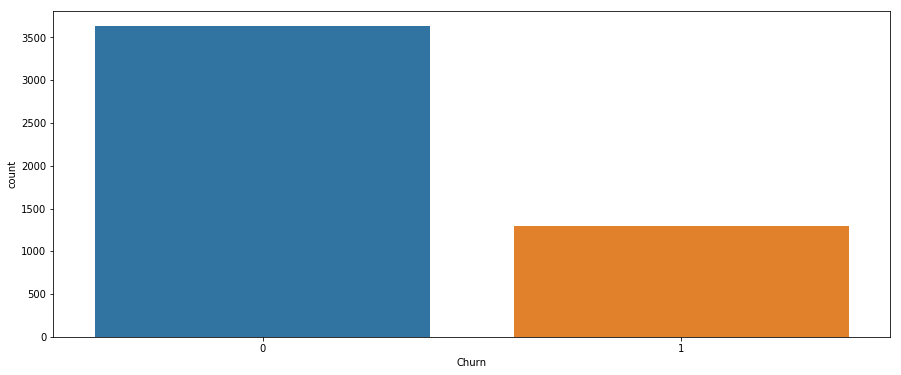

In [8]:
#Class imbalance
plt.figure(figsize=(15,6))
sns.countplot(x='Churn', data=train);


As we can see the classes in our training set are pretty imbalanced, so evaluating our model only in terms of accuracy can be misleading. Since we are in the case of binary classification, the metrics that are crucial indicators of performance are precision, recall and the F measure, as explained in the introduction section. Due to the imbalance, intuitively we can anticipate the fact that the classifier will have a hard time learning to classify the minority class, so the construction of the model must be aware of this fact.
     

### 1.2 Univariate analysis

The first glance at the data will be univariate analysis of the different features. This will allow us to visualize the relationship that each feature has with the target class.

#### a) Low cardinality features

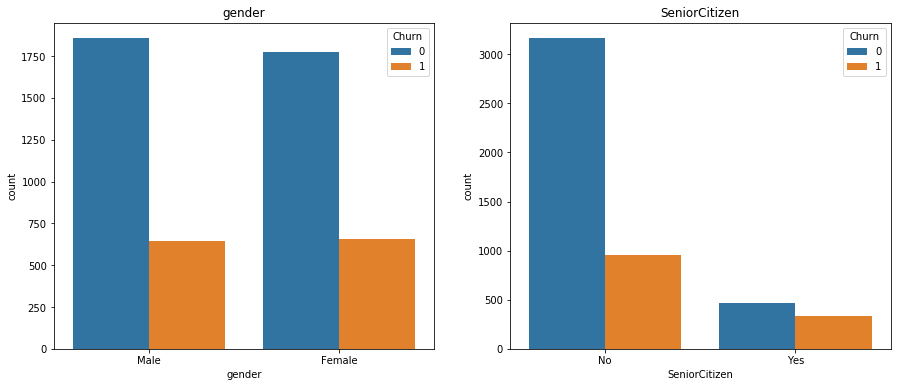

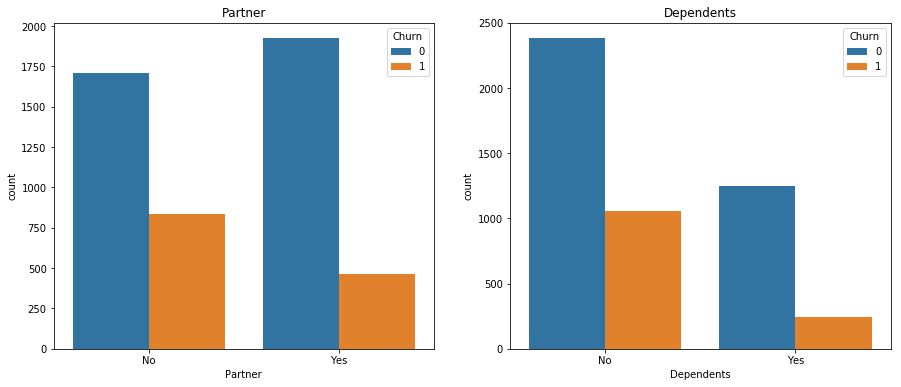

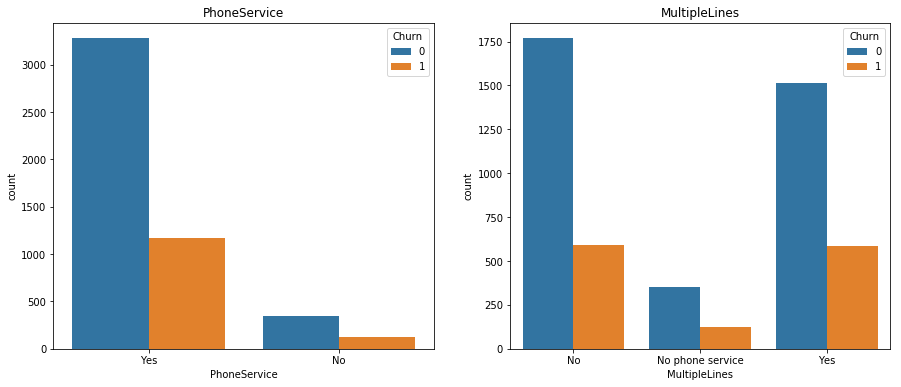

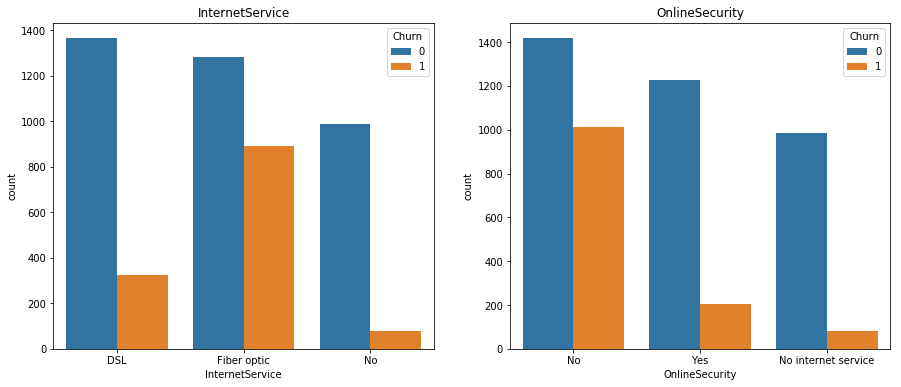

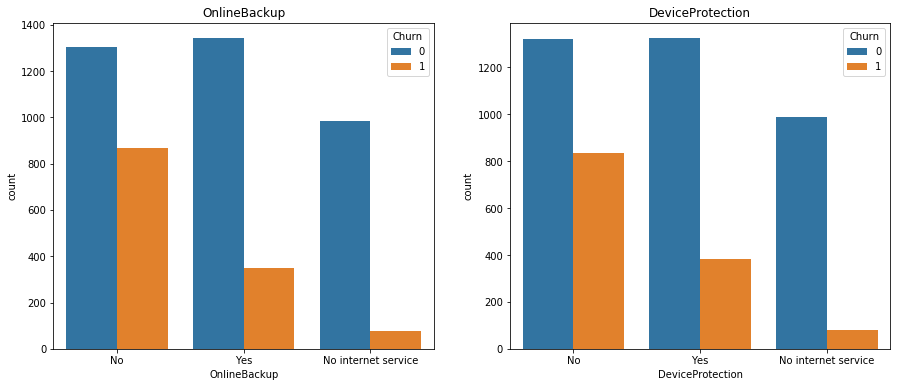

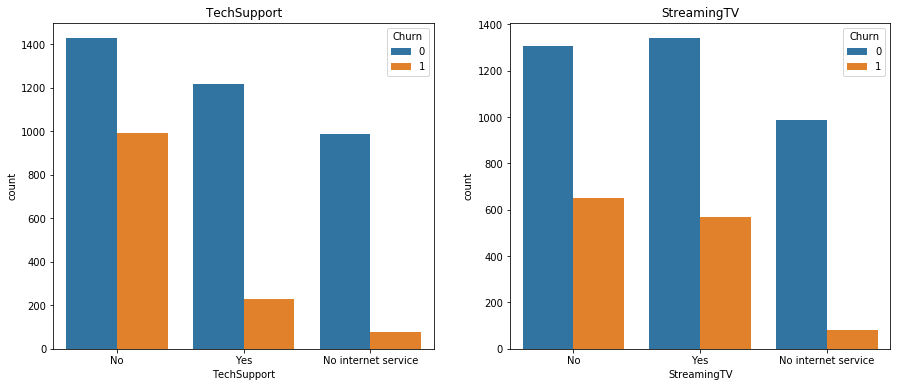

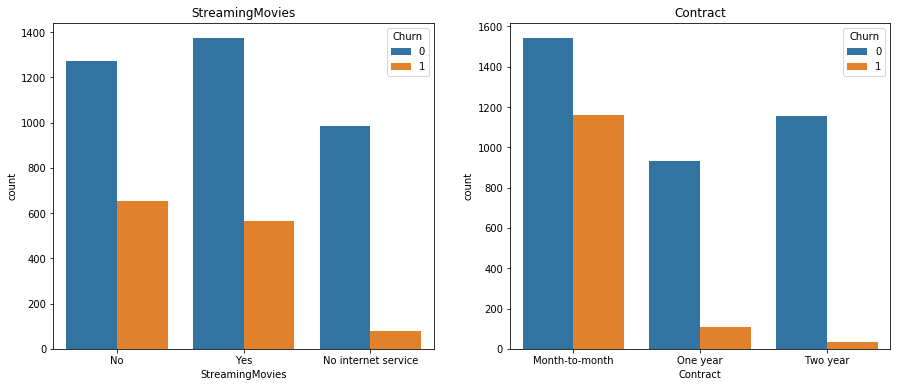

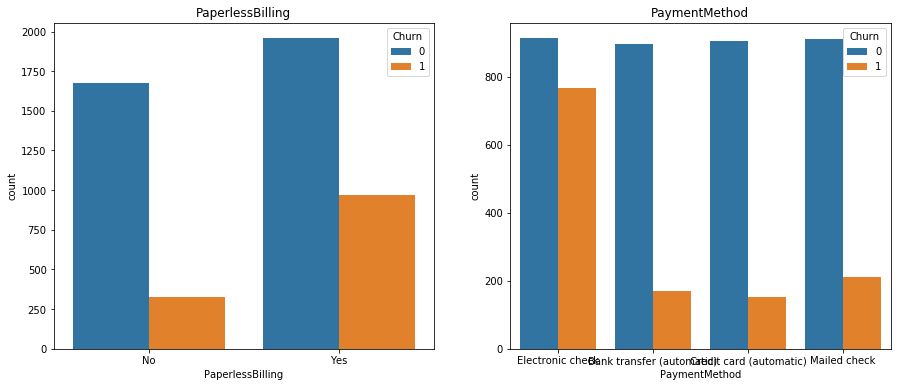

In [9]:
low_card_features = [col for col in train.columns
                     if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID', 'Churn']]

for i in range(0,len(low_card_features)-1,2) :
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    ax1.set_title(low_card_features[i])
    sns.countplot(x=low_card_features[i], data=train, hue='Churn', ax=ax1)
    ax2.set_title(low_card_features[i+1])
    sns.countplot(x=low_card_features[i+1], data=train, hue='Churn', ax=ax2)
    plt.show()

#### b) Higher cardinality features

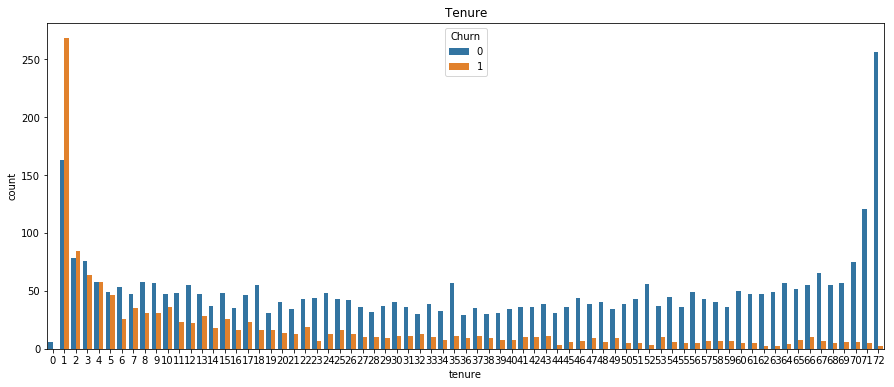

In [10]:
plt.figure(figsize=(15,6))
plt.title('Tenure')
sns.countplot(x='tenure', data=train, hue='Churn');

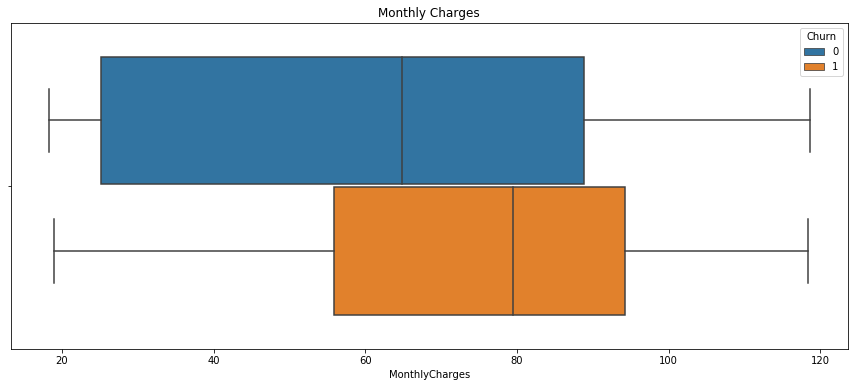

In [11]:
plt.figure(figsize=(15,6))
plt.title('Monthly Charges')
sns.boxplot(x=train['MonthlyCharges'],y=[""]*len(train),hue=train['Churn']);

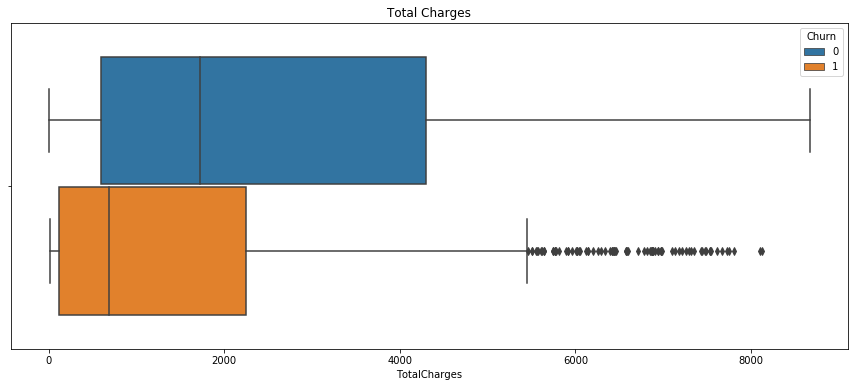

In [12]:
plt.figure(figsize=(15,6))
plt.title('Total Charges')
sns.boxplot(x=train['TotalCharges'],y=[""]*len(train),hue=train['Churn']);


We can see that some interesting information can already be extracted here. For example the gender feature is not representative of the target class whereas other features like Contract or tenure are. This can be used for the feature engineering part of this case.


# 3. Feature extraction



The data that we are dealing with has many categorical values, so a proper feature extraction must be done to present a fully numeric input to the classifier. Categorical features can be encoded into numerical ones in different ways: label encoding, one-hot encoding, etc. The encoding will influence the results obtained with the classifier so it must be chosen carefully. 
<br/>
<br/>
Customer ID will be dropped since it corresponds to the index of the dataframe. Here is the Feature Extractor component of the workflow: we will run an example with a reduced version of the data, without the numerical features, using one hot encoding. This is only one option among others, and maybe not the best.


In [14]:
%%file submissions/starting_kit/feature_extractor.py
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np 

class FeatureExtractor():
    
    def __init__(self):
        pass

    def fit(self, X_df, y):
        pass

    def transform(self, X_df):
        
        X_tf = pd.DataFrame()
        
        # Change datatypes of the columns that we pointed out in the first section
        X_df.loc[:,'SeniorCitizen'] = X_df['SeniorCitizen'].map(lambda x: 'No' if x==0 else 'Yes')
        X_df.loc[:,'TotalCharges'] = X_df['TotalCharges'].map(lambda x: 0. if x==' ' else float(x))
        
        # For the first step, consider only the categorical features of the data
        X_df_reduced = X_df.drop(['tenure', 'MonthlyCharges', 'TotalCharges','customerID'], axis=1)

        # Perform one-hot encoding on the categorical variables
        X_tf = pd.get_dummies(X_df_reduced)
        
        return X_tf


Overwriting submissions/starting_kit/feature_extractor.py


# 4. Classification task



After transforming our data into a feature matrix, we need to feed it into the classifier, the nest part of the workflow. A sklearn wrapper is given, and an example is shown using a Random Forest classifier.
<br/>
<br/>
Keep in mind that the classification task is to predict the potential churners in the customer base of a given telecom company. Emphasis is to be made on the recall value, hence a weighted f_score will be used in the RAMP workflow to evaluate the resulting clasifier.


In [15]:
%%file submissions/starting_kit/classifier.py
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestClassifier

class Classifier(BaseEstimator):
    
    def __init__(self):
        self.clf = RandomForestClassifier()
        
    def fit(self, X, y):
        self.clf.fit(X, y)
        
    def predict(self, X):
        return self.clf.predict(X)

    def predict_proba(self, X):
        return self.clf.predict_proba(X)

Overwriting submissions/starting_kit/classifier.py


---
## Local testing (before submission)

Let us test the the workflow locally without cross validation and RAMP. We will use sklearn classification report and confusion matrix metricscto quickly visualize the performance of the classifier on the tested dataset. The f1_score here will not be weighted, so the user must pay attention to the recall value to judge the performance.

In [18]:
# %load submissions/starting_kit/classifier.py

In [20]:
# %load submissions/starting_kit/feature_extractor.py

-------- Training Done in 0.060081 s ------------------
Printing Score...
             precision    recall  f1-score   support

Non-churner       0.83      0.87      0.85       736
    Churner       0.56      0.48      0.51       250

avg / total       0.76      0.77      0.76       986

-------- Visualizing confusion matrix ------------------


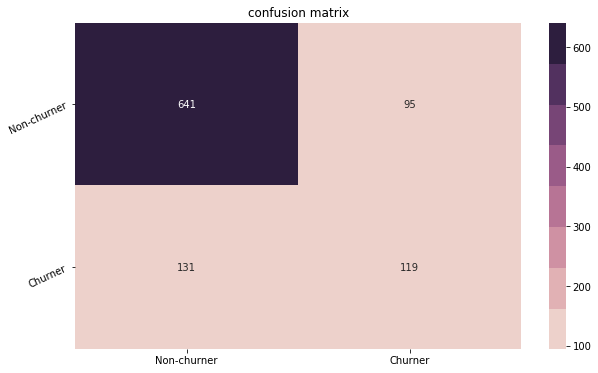

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separate data from labels
X_train = train.drop(['Churn'], axis=1)
Y_train = train['Churn']

# Split the training data for local testing
X_train,X_test_local,Y_train,Y_test_local = train_test_split(X_train,Y_train,test_size = 0.20) 
        
# Transform data into feature matrices
F = FeatureExtractor()
X_train = F.transform(X_train)
X_test_local = F.transform(X_test_local)

# Create classifier instance and train
clf = Classifier()
t0=time()
clf.fit(X_train,Y_train)
print('------------------ Training Done in %f s ------------------\nPrinting Score...' %(time()-t0))

# Run prediction on test data
y_pred = clf.predict(X_test_local)

# Visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(10,6))
plt.title('confusion matrix')
cm = confusion_matrix(Y_test_local, y_pred)
g = sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap=sns.cubehelix_palette(8));
g.set_yticklabels(['Non-churner', 'Churner'], rotation=25)
g.set_xticklabels(['Non-churner', 'Churner'])

# Print classification report to have metrics on both classes
print(classification_report(Y_test_local, y_pred, target_names=['Non-churner', 'Churner']))
print('------------------ Visualizing confusion matrix ------------------')

We can see that since the initial data set is imbalanced, our model has a hard time classifying the minority class of churners correctly. 

---
## Local testing with RAMP (before submission)

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. For this we provide a unit test. Note that the test runs on your files in [`submissions/starting_kit`](/tree/submissions/starting_kit), not on the classes defined in the cells of this notebook.

First `pip install ramp-workflow` or install it from the [github repo](https://github.com/paris-saclay-cds/ramp-workflow). Make sure that the python files `feature_extractor.py` and `classifier.py` are in the  [`submissions/starting_kit`](/tree/submissions/starting_kit) folder, and the data `train.csv` and `test.csv` are in [`data`](/tree/data). Then run

```ramp_test_submission```

If it runs and print training and test errors on each fold, then you can submit the code.

In [37]:
!ramp_test_submission --quick-test

Testing Churn rate prediction
Reading train and test files from ./data ...
Reading cv ...
Training .\submissions\starting_kit ...
CV fold 0
	score  weighted_fscore  recall  precision
	train             0.91    0.90       0.97
	valid             0.49    0.46       0.67
	test              0.59    0.59       0.64
CV fold 1
	score  weighted_fscore  recall  precision
	train             0.93    0.93       0.95
	valid             0.60    0.62       0.53
	test              0.55    0.55       0.56
CV fold 2
	score  weighted_fscore  recall  precision
	train             0.94    0.93       1.00
	valid             0.48    0.46       0.60
	test              0.42    0.40       0.56
CV fold 3
	score  weighted_fscore  recall  precision
	train             0.91    0.90       0.97
	valid             0.25    0.23       0.50
	test              0.51    0.50       0.56
CV fold 4
	score  weighted_fscore  recall  precision
	train             0.97    0.97       0.97
	valid             0.33    0.31       0.57
	te

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, perhaps do some AutoML/hyperopt, etc., _locally_, and checking them with `ramp_test_submission`. The script prints mean cross-validation scores **with respect to the churner (positive) class** using a Startified Shuffle Split from scikit learn library
```
----------------------------
train weighted_fscore = 0.84 ± 0.01
train recall = 0.83 ± 0.01
train precision = 0.85 ± 0.01
valid weighted_fscore = 0.47 ± 0.025
valid recall = 0.45 ± 0.028
valid precision = 0.54 ± 0.02
test weighted_fscore = 0.46 ± 0.012
test recall = 0.43 ± 0.014
test precision = 0.54 ± 0.012
```
The official score for this RAMP would be the weighted F measure, so the line that is relevant in the output of `ramp_test_submission` is `valid weighted_fscore = 0.47 ± 0.025`.